In [1]:
import pandas as pd 
import numpy as np
gait_dataset = pd.read_csv('gait_features_all_subjects_with_stroke.csv')
gait_dataset

,step_time_left,step_time_right,force_asymmetry,stance_time_left,swing_time_left,impulse_left,stride_length_left,vertical_disp_left,foot_velocity_left,peak_force_left,...,stance_time_right,swing_time_right,impulse_right,vertical_disp_right,foot_velocity_right,stride_length_right,step_width,subject,speed,target
0,0.5936,1.6380,40.346007,1.149,0.512,667.092531,0.184841,0.007396,0.435459,825.101379,...,-0.553,2.162,0.0,0.122993,0.141867,0.191281,0.099112,1,0.6,1
1,1.1760,0.3810,19.952393,1.095,0.495,646.403273,0.294134,0.208099,0.250811,817.153992,...,-0.548,2.157,0.0,0.007193,0.620570,0.235685,0.076835,1,0.6,0
2,0.2210,1.2130,7.319214,1.119,0.530,665.519074,0.141113,0.000996,0.627357,817.774231,...,-0.551,2.194,0.0,0.195043,0.182083,0.220041,0.107222,1,0.6,0
3,0.3696,0.2938,10.679626,1.125,0.462,662.758870,0.114275,0.002084,0.439638,803.586792,...,-0.526,2.121,0.0,0.001601,0.436198,0.105134,0.104683,1,0.6,1
4,1.1360,0.2070,7.300476,1.137,0.529,687.981411,0.241174,0.193034,0.211679,782.675293,...,-0.576,2.205,0.0,0.007193,0.610970,0.125020,0.110397,1,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,0.6050,0.6010,12.254273,0.574,0.337,251.744427,0.541564,0.233917,0.896681,667.596069,...,-0.338,1.242,0.0,0.231840,0.912840,0.546482,0.106736,21,1.7,0
12426,0.3090,0.3020,9.983459,0.586,0.327,255.381918,0.537693,0.039370,1.739953,648.780884,...,-0.333,1.256,0.0,0.029723,1.745002,0.522435,0.107241,21,1.7,0
12427,0.5890,0.6010,25.619141,0.573,0.328,250.399083,0.558706,0.238925,0.959532,633.162048,...,-0.340,1.241,0.0,0.231399,0.864920,0.521877,0.129488,21,1.7,0
12428,0.4508,0.4069,0.825897,0.585,0.332,257.716022,0.398595,0.018691,1.228639,647.111694,...,-0.330,1.245,0.0,0.020171,1.215733,0.402852,0.117958,21,1.7,1


In [2]:
gait_dataset = gait_dataset.drop(['subject', 'speed'], axis=1)
gait_dataset.head()

,step_time_left,step_time_right,force_asymmetry,stance_time_left,swing_time_left,impulse_left,stride_length_left,vertical_disp_left,foot_velocity_left,peak_force_left,peak_force_right,step_time_diff,stance_time_right,swing_time_right,impulse_right,vertical_disp_right,foot_velocity_right,stride_length_right,step_width,target
0,0.5936,1.6380,40.346007,1.149,0.512,667.092531,0.184841,0.007396,0.435459,825.101379,798.204041,1.672,-0.553,2.162,0.0,0.122993,0.141867,0.191281,0.099112,1
1,1.1760,0.3810,19.952393,1.095,0.495,646.403273,0.294134,0.208099,0.250811,817.153992,797.201599,0.795,-0.548,2.157,0.0,0.007193,0.620570,0.235685,0.076835,0
2,0.2210,1.2130,7.319214,1.119,0.530,665.519074,0.141113,0.000996,0.627357,817.774231,810.455017,0.992,-0.551,2.194,0.0,0.195043,0.182083,0.220041,0.107222,0
3,0.3696,0.2938,10.679626,1.125,0.462,662.758870,0.114275,0.002084,0.439638,803.586792,796.467041,0.076,-0.526,2.121,0.0,0.001601,0.436198,0.105134,0.104683,1
4,1.1360,0.2070,7.300476,1.137,0.529,687.981411,0.241174,0.193034,0.211679,782.675293,775.374817,0.929,-0.576,2.205,0.0,0.007193,0.610970,0.125020,0.110397,0


# Principal Component Analysis (PCA) Method

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler
# Import the dataset
gait_dataset

from sklearn.model_selection import train_test_split

# Separate features and target
X = gait_dataset.drop('target', axis=1)  # Independent variables
y = gait_dataset['target']               # Dependent variable

# Split the data into training, validation, and testing sets directly (no resampling)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0, stratify=y_trainval)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Apply PCA after scaling
pca = PCA(n_components=None)  # Keep all components first to analyze variance
X_pca = pca.fit_transform(X_train)  # Use training data here

# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.23611428, 0.18677169, 0.12064846, 0.11206521, 0.10569348,
       0.08657919, 0.04841352, 0.03161757, 0.0310767 , 0.01308557,
       0.00861533, 0.0056354 , 0.00516949, 0.00359345, 0.00210892,
       0.00137586, 0.0007065 , 0.00047246, 0.00025691])

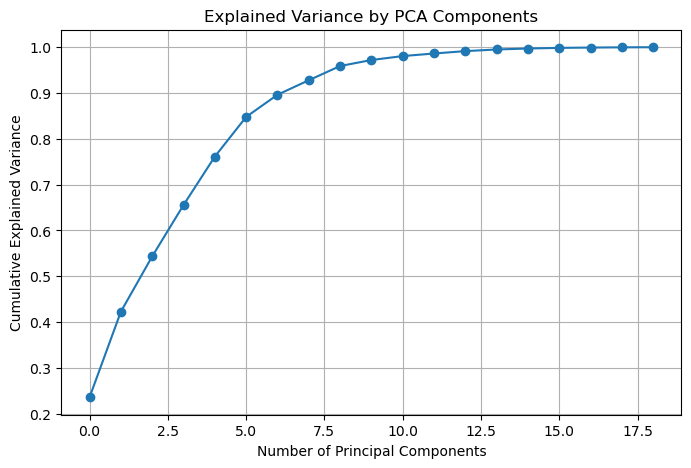

In [7]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [10]:
pca_components = pca.components_
pca_components    

array([[ 2.49880906e-01,  2.37207372e-01, -1.27923432e-01,
        -1.63723068e-01,  2.54878945e-01, -1.41735150e-01,
        -4.00668559e-01, -5.00903682e-03, -3.61380064e-01,
        -2.42156928e-01, -2.38061732e-01,  1.95239284e-01,
         7.21880671e-02,  4.08134025e-02,  9.52688902e-02,
        -1.04474044e-02, -3.57932298e-01, -4.03354402e-01,
        -4.01282386e-02],
       [ 9.03951458e-02,  1.12597572e-01,  2.47959304e-02,
         3.65508506e-01, -2.93523536e-01,  3.76750950e-01,
        -1.24800032e-01,  6.09652391e-03, -1.17776199e-01,
         8.31582908e-03,  3.66399643e-03,  4.97007599e-02,
        -4.32276363e-01,  4.31699855e-01, -4.17925476e-01,
         3.28070978e-02, -1.35674329e-01, -1.23141690e-01,
         4.76301773e-02],
       [ 5.16753170e-02,  1.62054013e-01, -3.39631340e-02,
        -3.53101635e-01,  3.38991035e-01, -3.11619580e-01,
         4.59610419e-02,  7.58794482e-02, -2.61131414e-02,
         3.54725837e-01,  3.43620388e-01, -1.69933544e-01,
    

In [16]:
import pandas as pd

# Use the same feature names used in your PCA
feature_names = X.columns  # or manually list them

# Convert components to DataFrame
pca_df = pd.DataFrame(pca_components[:6],  # First 6 PCs
                      columns=feature_names,
                      index=[f'PC{i+1}' for i in range(6)])
pca_df

,step_time_left,step_time_right,force_asymmetry,stance_time_left,swing_time_left,impulse_left,stride_length_left,vertical_disp_left,foot_velocity_left,peak_force_left,peak_force_right,step_time_diff,stance_time_right,swing_time_right,impulse_right,vertical_disp_right,foot_velocity_right,stride_length_right,step_width
PC1,0.249881,0.237207,-0.127923,-0.163723,0.254879,-0.141735,-0.400669,-0.005009,-0.361380,-0.242157,-0.238062,0.195239,0.072188,0.040813,0.095269,-0.010447,-0.357932,-0.403354,-0.040128
PC2,0.090395,0.112598,0.024796,0.365509,-0.293524,0.376751,-0.124800,0.006097,-0.117776,0.008316,0.003664,0.049701,-0.432276,0.431700,-0.417925,0.032807,-0.135674,-0.123142,0.047630
PC3,0.051675,0.162054,-0.033963,-0.353102,0.338991,-0.311620,0.045961,0.075879,-0.026113,0.354726,0.343620,-0.169934,-0.244772,0.253099,-0.205393,0.192529,-0.102326,0.066619,0.365708
PC4,0.096525,0.392727,0.184131,0.200925,-0.198213,0.219975,0.052072,0.108453,-0.039149,0.215028,0.184287,0.194923,0.258881,-0.256377,0.273589,0.429580,-0.273884,0.077906,0.258991
PC5,0.495998,-0.278418,0.076252,0.037954,-0.036340,0.052727,0.020278,0.531624,-0.385354,0.127258,0.204482,0.074398,0.049832,-0.048617,0.064361,-0.308111,0.242182,0.023904,0.083025
PC6,0.142347,0.138177,-0.151231,-0.030939,-0.036610,-0.085345,0.288993,0.454556,-0.081402,-0.324561,-0.319950,-0.342013,-0.066863,-0.002538,-0.111142,0.409852,-0.056071,0.258524,-0.227946


In [17]:
for i in range(6):
    print(f"\nTop contributing features for PC{i+1}:")
    print(pca_df.iloc[i].abs().sort_values(ascending=False).head(3))



Top contributing features for PC1:
stride_length_right    0.403354
stride_length_left     0.400669
foot_velocity_left     0.361380
Name: PC1, dtype: float64

Top contributing features for PC2:
stance_time_right    0.432276
swing_time_right     0.431700
impulse_right        0.417925
Name: PC2, dtype: float64

Top contributing features for PC3:
step_width          0.365708
peak_force_left     0.354726
stance_time_left    0.353102
Name: PC3, dtype: float64

Top contributing features for PC4:
vertical_disp_right    0.429580
step_time_right        0.392727
foot_velocity_right    0.273884
Name: PC4, dtype: float64

Top contributing features for PC5:
vertical_disp_left    0.531624
step_time_left        0.495998
foot_velocity_left    0.385354
Name: PC5, dtype: float64

Top contributing features for PC6:
vertical_disp_left     0.454556
vertical_disp_right    0.409852
step_time_diff         0.342013
Name: PC6, dtype: float64


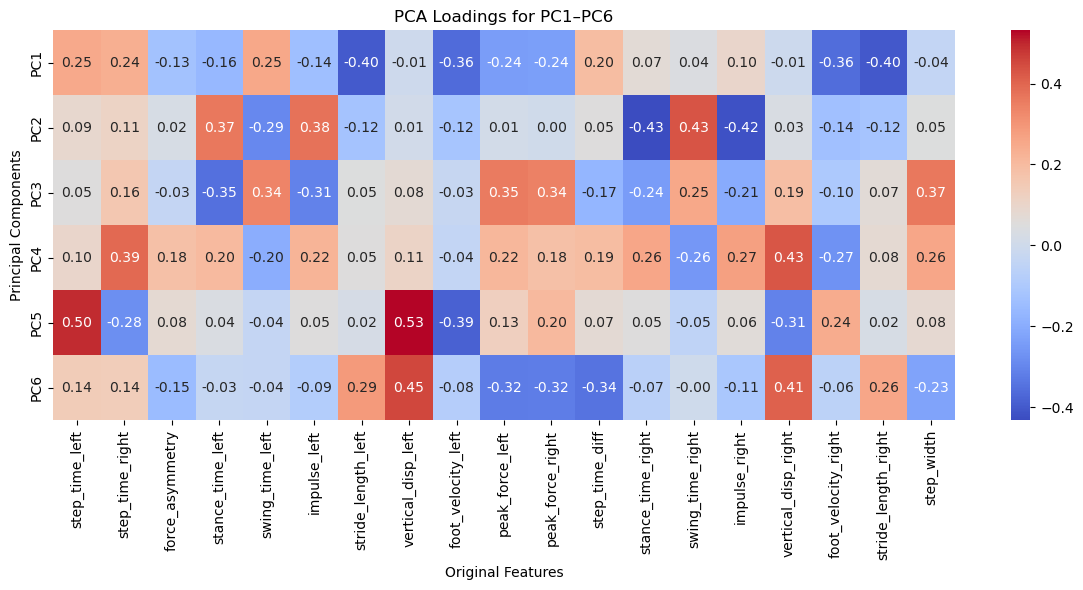

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pca_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loadings for PC1–PC6')
plt.ylabel('Principal Components')
plt.xlabel('Original Features')
plt.tight_layout()
plt.show()


In [19]:
from sklearn.decomposition import PCA

# Apply PCA and reduce to top 6 components
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7031 - loss: 0.5260 - val_accuracy: 0.7940 - val_loss: 0.4106
Epoch 2/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8053 - loss: 0.3963 - val_accuracy: 0.8254 - val_loss: 0.3835
Epoch 3/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8304 - loss: 0.3640 - val_accuracy: 0.8331 - val_loss: 0.3595
Epoch 4/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8513 - loss: 0.3332 - val_accuracy: 0.8484 - val_loss: 0.3278
Epoch 5/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8767 - loss: 0.2901 - val_accuracy: 0.9051 - val_loss: 0.2631
Epoch 6/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9166 - loss: 0.2380 - val_accuracy: 0.9256 - val_loss: 0.2236
Epoch 7/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9337 - loss: 0.1967 - val_accuracy: 0.9296 - val_loss: 0.2045
Epoch 8/100
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9375 - loss: 0.1766 - val_acc

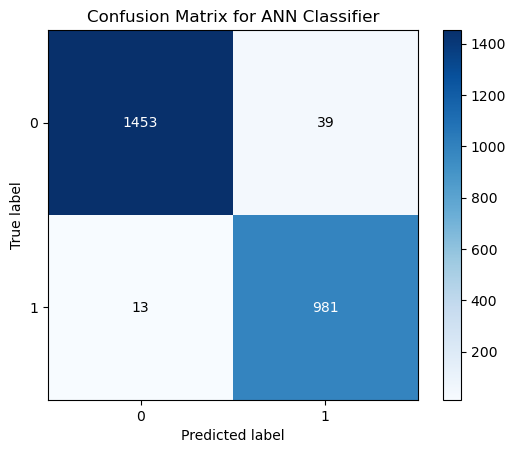

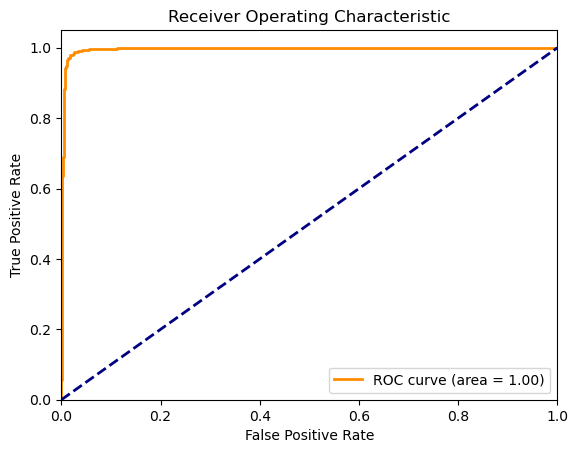

AUC: 1.00


In [25]:
# Artificial Neural Networks 
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt  # Make sure scikit-plot is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Apply PCA and reduce to top 6 components
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Build the ANN
classifier = Sequential()
classifier.add(Dense(units=5, activation='relu', input_dim=6))  # Input layer with 6 PCs
classifier.add(Dense(units=5, activation='relu'))               # Hidden layer
classifier.add(Dense(units=1, activation='sigmoid'))            # Output layer

# Compile
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = classifier.fit(X_train_pca, y_train, validation_data=(X_val_pca, y_val), epochs=100, batch_size=10)

# Predicting the Test set results
y_pred_proba = classifier.predict(X_test_pca)  # Get probabilities for ROC and AUC
y_pred = (y_pred_proba > 0.5)  # Convert probabilities to class labels

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Classification Report and Confusion Matrix for test set
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# Visualize the ROC Curve
# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\svm\_clas

Cross Validation Scores: [0.94117647 0.95324284 0.94720965 0.9436903  0.93863179]
Average CV Score: 0.9447902093303917
Validation Accuracy : 0.9469026548672567
Test Accuracy: 0.9332260659694288

SVC Classifier:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1492
           1       0.93      0.90      0.92       994

    accuracy                           0.93      2486
   macro avg       0.93      0.93      0.93      2486
weighted avg       0.93      0.93      0.93      2486

Confusion Matrix:
[[1423   69]
 [  97  897]]
Accuracy for class 0: 0.9538
Accuracy for class 1: 0.9024


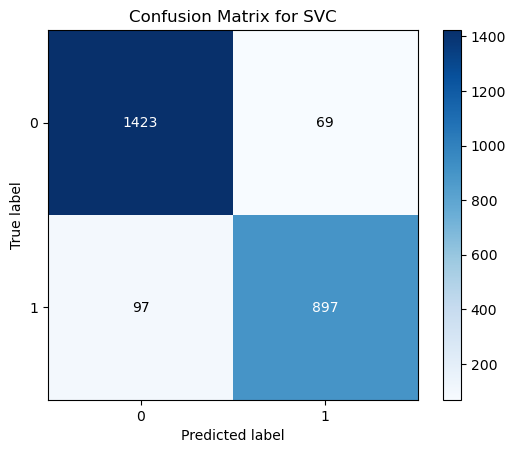

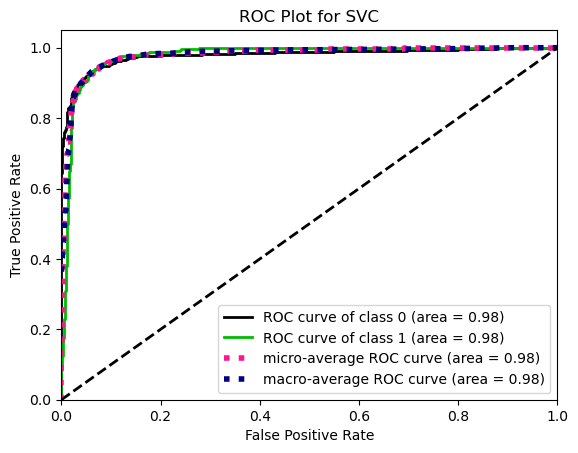

AUC SVC: 0.98


In [28]:
# SVC Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training, validation, and testing sets directly (no resampling)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0, stratify=y_trainval)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Apply PCA and reduce to top 6 components
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# If you must stick with LinearSVC, you can use the decision_function and apply a transformation (e.g., sigmoid) to approximate probabilities
# Instantiate the LinearSVC model
# Wrap LinearSVC in a calibration model
SVCclassifier = LinearSVC(C=5, random_state=0, max_iter=10000)
SVCmodel = CalibratedClassifierCV(SVCclassifier, method='sigmoid')
SVCmodel.fit(X_train_pca, y_train)


# Perform Cross Validation on the training set
k = 5  # Reduced from 10 for faster computation
scores = cross_val_score(SVCmodel, X_trainval, y_trainval, cv=k)

print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

import scikitplot as skplt  # Make sure scikit-plot is installed
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Make predictions on the validation set using the best model
y_pred_val = SVCmodel.predict(X_val_pca)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy :", accuracy_val)

# Make predictions on the test set
y_pred_test = SVCmodel.predict(X_test_pca)

# Evaluate the model on test set SVCclassifier
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for SVC')
plt.show()

# Visualize the ROC Curve
# Now you can use predict_proba
y_pred_proba = SVCmodel.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC')
plt.show()

# Calculate AUC Score for the test set
from sklearn.metrics import roc_auc_score

# Extract only probabilities for class 1 (positive class)
auc_value = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC SVC: {auc_value:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1492
           1       0.98      0.99      0.99       994

    accuracy                           0.99      2486
   macro avg       0.99      0.99      0.99      2486
weighted avg       0.99      0.99      0.99      2486

Confusion Matrix:
 [[1476   16]
 [  10  984]]
AUC Score: 0.9996402678807429


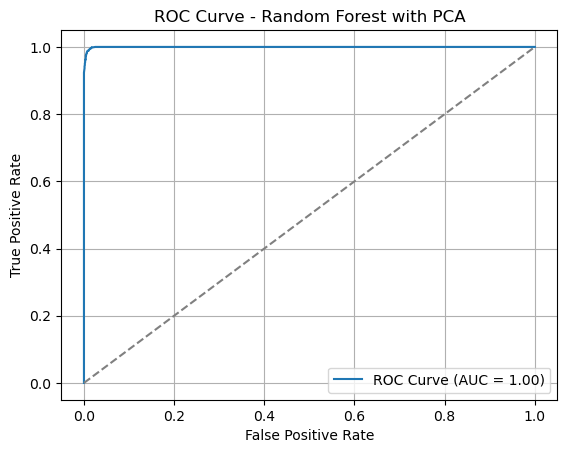

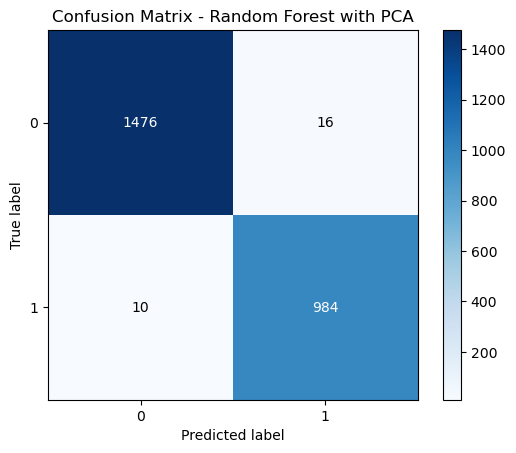

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import scikitplot as skplt

# Step 1: Create pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),      # First scale the data
    ('pca', PCA(n_components=6)),      # Then reduce dimensions
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0))  # Then train the model
])

# Step 2: Fit pipeline on training data
rf_pipeline.fit(X_train, y_train)

# Step 3: Predict on test data using the same pipeline
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Step 4: Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Step 5: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest with PCA')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title('Confusion Matrix - Random Forest with PCA')
plt.show()
